In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import pickle

In [2]:
path = "celebdata"

In [3]:
images = []
labels = []

In [4]:
def load_images_from_folder(path, image_size):
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
image_size = (250,250)

In [6]:
X, y = load_images_from_folder(path, image_size)

In [7]:
X = X / 255.0

In [8]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [9]:
y = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

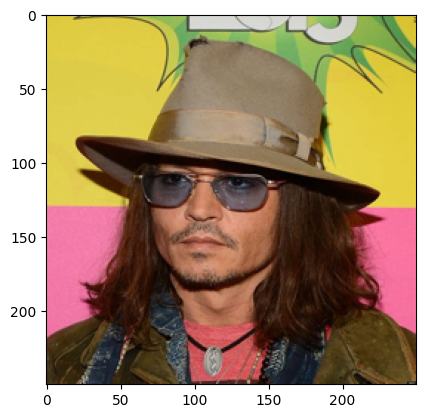

In [11]:
plt.imshow(X_train[1])

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu',
                 input_shape=(250, 250, 3)))  # Increased L2 regularization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Conv2D layer with L2 regularization and BatchNormalization
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))  # Increased L2 regularization
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer with L2 regularization and BatchNormalization
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Increased L2 regularization

# Output layer
model.add(Dense(len(labelencoder.classes_), activation='softmax'))

C:\Users\L E N O V O\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,504,145 (116.36 MB)

 Trainable params: 30,504,145 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 961ms/step - accuracy: 0.0750 - loss: 7.6752 - val_accuracy: 0.1519 - val_loss: 4.0848
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 714ms/step - accuracy: 0.1445 - loss: 3.8211 - val_accuracy: 0.1852 - val_loss: 3.2631
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 696ms/step - accuracy: 0.2098 - loss: 3.1742 - val_accuracy: 0.1963 - val_loss: 3.0445
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 686ms/step - accuracy: 0.2635 - loss: 2.8794 - val_accuracy: 0.2315 - val_loss: 2.9717
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 704ms/step - accuracy: 0.3093 - loss: 2.7599 - val_accuracy: 0.2519 - val_loss: 2.9131
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 684ms/step - accuracy: 0.3955 - loss: 2.5682 - val_accuracy: 0.2185 - val_loss: 3.1059
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 684ms/step - accuracy: 0.5975 - loss: 2.3079 - val_accuracy: 0.2519 - val_loss: 3.4348
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 703ms/step - accuracy: 0.7569 - loss: 2.0641 - val_accu

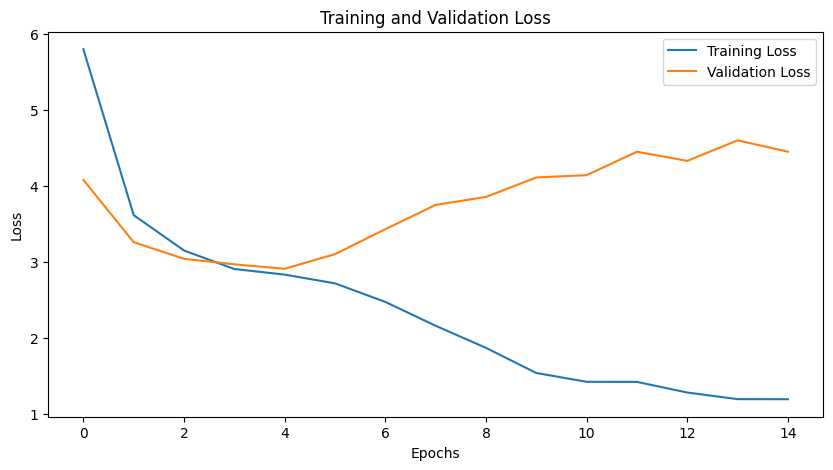

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [20]:
model.save('celebrity_model.h5')

In [22]:
with open('labelencoder.pkl', 'wb') as f:
        pickle.dump(labelencoder, f)